# Get Masked Betas for each participant

First, imports and paths:

In [38]:
# Imports and setup paths
import nilearn
from os.path import join
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

steph_dir = '/imaging/astle/users/su01/RED'
perm_dir = join(steph_dir, '3 Permutations_SnPM/Outputs/Go NoGo/1 Sad go vs nogo')
group_mask_file= join(perm_dir, 'Sad_neg_SnPM_filtered.nii')

read in the .nii file from the group level as data

Reading in the data gives us a numpy array, which is much more flexible than niilearns own formats

This is a 3D array representing voxels, nan values represent no significance, anything not a nan is a significant beta


In [39]:
group_mask = nilearn.image.get_data(group_mask_file)


 we now convert this image of NaN's and numbers into a boolean array, which we can later use as an index
 Numpy allows boolean indexing, so we can just use our mask as an array to blank out other files
 See: https://numpy.org/devdocs/reference/arrays.indexing.html#boolean-array-indexing

 we use numpy is nan, which returns True if a number is NaN -- we want to reverse this, so we put the '~' preceding


In [40]:
group_boolean_mask = ~np.isnan(group_mask) # get a mask of true and false for if that voxel was significant

now we want to loop through the lower level files and get a beta value for each participant using this mask

First, set up paths to the 1st level directories and contrast names.

Then make a list of all the subject folders

In [41]:
first_level_directory = join(steph_dir, '1stlevel_output_gng', '1stLevel')
cont_name = 'con_0002.nii' # make sure this matches the GLM contrast ie. 'Happy Go > Sad Go'
sublist = listdir(first_level_directory) # list all directories in this folder

Now loop through the subject folders using enumerate

We then mask these lower level statsitics and can use them to get a summary stat for each child

In [42]:
beta_vals = [] # our beta value list holder
for i, sub_dir in enumerate(sublist):
    this_beta = nilearn.image.get_data(join(first_level_directory, sub_dir, cont_name))# read in the betas from this participant, again as a numpy array
    this_masked_vals = this_beta[group_boolean_mask] # mask them using the boolean mask
    this_masked_vals = np.abs(this_masked_vals) # take absolute values (for ease)
    this_beta_stat = np.mean(this_masked_vals) # take sum (but you can use average - np.mean(), peak np.max() or whatever function you'd like)
    beta_vals.append((sub_dir, this_beta_stat)) # append this participants value along with their ID


now we have the summed/averaged (depending) activity for each participant, masked by the group level contrast

If significant, we can also go back and get the masked values only and look at which voxels most predict the covariates
but for now these are pretty good as is

In [43]:
print(beta_vals)

[('sub-055', 1.2555135), ('sub-025', 0.94920754), ('sub-058', 0.9431813), ('sub-009', 0.66055083), ('sub-003', 0.76158583), ('sub-010', 0.6178067), ('sub-017', 0.31494662), ('sub-060', 0.819573), ('sub-073', 0.8548304), ('sub-013', 0.36789253), ('sub-077', 0.69255245), ('sub-045', 0.5103794), ('sub-019', 0.31739792), ('sub-041', 1.1765509), ('sub-064', 0.15247415), ('sub-051', 0.69961697), ('sub-063', 0.33965155), ('sub-048', 1.5756918), ('sub-021', 2.0208623), ('sub-035', 0.6070975), ('sub-007', 0.917379), ('sub-072', 0.461675), ('sub-037', 0.78462213), ('sub-014', 0.4535731), ('sub-070', 0.3812001), ('sub-040', 0.4991099), ('sub-024', 1.0950947), ('sub-005', 0.5304545), ('sub-029', 0.41901225), ('sub-016', 1.0768431), ('sub-053', 0.1982736), ('sub-011', 0.52335036), ('sub-054', 0.6417461), ('sub-002', 1.1890302), ('sub-075', 0.6004145), ('sub-008', 1.3299916), ('sub-047', 0.3573198), ('sub-030', 0.4797642), ('sub-006', 1.0632322), ('sub-027', 0.8416913), ('sub-015', 0.6001036), ('sub

In [44]:
# Make into dataframe with columns
beta_df = pd.DataFrame(np.array(beta_vals), columns = ['sub_id', 'avg_betas'])
beta_df.averaged_betas = beta_df.avg_betas.astype('float') #to make into numeric values
beta_df = beta_df.sort_values('sub_id') #sort in ascending order by sub-id

/imaging/local/software/miniconda/envs/neuroconda_2_0/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# write into csv (ownCloud directory for merging purposes)
beta_df.to_csv(steph_dir + '/Beta outputs/sad_nogovsgo_betas.csv', index = False)

## Final analysis steps
Can look at any of the covariates

May do this on local computer so will need to change some directories and paths if that is the case

Also import packages again

In [2]:
import nilearn
from os.path import join
from os import listdir
import numpy as np
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns
os.getcwd()

'/Users/stepheniuh/ownCloud/PhD/RED/RED-scripts'

In [106]:
# load BIDS2RED and merge to get RED ids for data
output_dir = '/Users/stepheniuh/ownCloud/PhD/RED/Betas'
beta_dir = '/Users/stepheniuh/ownCloud/PhD/RED/Betas/Beta outputs'

# re-read in beta_df since we're working on local computer now
beta_df = pd.read_csv(beta_dir + '/happygo_sadgo_betas.csv')
red_ids = pd.read_excel('/Users/stepheniuh/ownCloud/PhD/RED/MRI Quality Checks/RED_fmri_finalids.xlsx')
main_df = pd.merge(beta_df, red_ids, on='sub_id')

In [4]:
# to look at output
main_df

,sub_id,avg_betas,red_id,cbu_id,mri_tag
0,sub-002,0.362081,99003,CBU180728,MR18013
1,sub-003,0.244647,99004,CBU190038,MR18013
2,sub-005,0.231745,99013,CBU190092,MR18013
3,sub-007,0.396660,99019,CBU190124,MR18013
4,sub-008,0.545396,99014,CBU190129,MR18013
5,sub-009,0.348532,99009,CBU190146,MR18013
6,sub-011,0.192987,99018,CBU190171,MR18013
7,sub-012,0.303265,99016,CBU190173,MR18013
8,sub-013,0.296426,99021,CBU190190,MR18013
9,sub-014,0.728237,99020,CBU190201,MR18013


In [107]:
#load in all metadata
META_PATH = join('/Users', 'stepheniuh','ownCloud','PhD', 'RED', 'Behavioral Data', 'RED_imputed_scaled.csv')
meta_df = pd.read_csv(META_PATH)
# drop the unnamed column
meta_df.drop(columns=['Unnamed: 0'])

# convert red_id into strings for both
main_df['red_id'] = main_df['red_id'].astype(str)
meta_df['red_id'] = meta_df['red_id'].astype(str)

# merge on red_id
with_data = pd.merge(main_df, meta_df, on='red_id')

# view merged dataframe
#with_data

In [108]:
# rename merged columns as we see _x and drop _y columns

# rename columns
# value = new name
names = {'sub_id_x': 'sub_id',
         'cbu_id_x': 'cbu_id',
         'mri_tag_x': 'mri_tag'}

with_data.rename(columns=names, inplace=True)

In [109]:
# drop columns
with_data = with_data.drop(columns = ['Unnamed: 0', 'sub_id_y', 'cbu_id_y', 'mri_tag_y'])

In [110]:
pd.set_option('display.max_columns', None) # to view all columns set this for dataframe viewing
# view data
display(with_data)

,sub_id,avg_betas,red_id,cbu_id,mri_tag,Age,Equivalised_Income,WASI_Mat,WASI_Voc,SDQ_emotional,SDQ_conduct,SDQ_peer,SDQ_hyperactivity,SDQ_prosocial,SDQ_total,SDQ_externalising,SDQ_internalising,objective_SES,subjective_SES,household_SES,Q2_RCADS_MDD,Q2_RCADS_GAD
0,sub-003,0.244647,99004,CBU190038,MR18013,2.784761,-0.896990,-0.993397,-1.561581,-0.516184,-0.434971,-0.980174,0.790965,-0.267326,-0.325920,0.299106,-0.919932,-1.633130,0.522199,-1.396517,-0.071807,-0.422822
1,sub-005,0.231745,99013,CBU190092,MR18013,1.481889,0.357089,0.111282,0.404703,-0.141698,-0.434971,-0.476474,0.050061,0.227227,-0.325920,-0.171827,-0.366477,0.430405,-0.060432,1.219825,0.215727,-1.174547
2,sub-007,0.396660,99019,CBU190124,MR18013,0.352666,1.611169,-1.595949,-1.561581,2.105221,0.570899,0.027227,1.161417,0.721781,1.578141,1.005506,1.570616,1.329502,-0.580815,-1.080703,1.783391,1.406493
3,sub-008,0.545396,99014,CBU190129,MR18013,-1.526744,0.357089,2.119790,0.782835,-0.516184,1.073834,2.042029,1.161417,-3.729201,1.260797,1.240973,0.740433,0.430405,-0.060432,1.219825,1.676116,-1.112142
4,sub-009,0.348532,99009,CBU190146,MR18013,0.592465,1.611169,0.814260,0.858461,-0.516184,0.570899,0.530928,0.420513,0.721781,0.308767,0.534573,-0.089749,1.630812,-1.169286,-0.968391,0.058346,0.432178
5,sub-011,0.192987,99018,CBU190171,MR18013,0.611350,-0.060937,-0.993397,0.177824,-0.890670,-0.434971,-0.980174,-0.690843,0.721781,-1.119279,-0.642760,-1.196660,0.229950,-1.787409,1.611688,-0.785413,-0.176510
6,sub-012,0.303265,99016,CBU190173,MR18013,-1.754489,0.357089,0.010857,0.782835,-0.890670,-0.937905,-0.980174,1.531869,-0.761880,-0.325920,0.534573,-1.196660,0.576008,-0.650956,-0.597785,0.935886,0.172179
7,sub-013,0.296426,99021,CBU190190,MR18013,0.488596,-0.896990,0.111282,0.329077,1.356248,0.067964,-0.980174,0.420513,0.721781,0.467438,0.299106,0.463706,-0.960004,0.483775,-0.196420,-1.607250,-2.316162
8,sub-014,0.728237,99020,CBU190201,MR18013,0.551662,-0.419763,0.814260,0.858461,-0.890670,-0.937905,0.027227,-0.690843,-0.267326,-0.960607,-0.878227,-0.643205,0.367572,-0.119219,0.001995,-0.173326,0.291325
9,sub-015,0.202457,99026,CBU190209,MR18013E,1.560919,0.357089,0.111282,-0.351560,0.607275,-0.434971,0.530928,0.050061,0.721781,0.308767,-0.171827,0.740433,0.423332,0.502573,-0.887183,-0.208132,1.278862


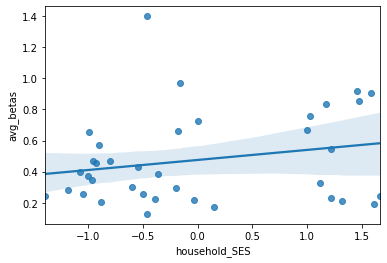

In [123]:
# Now do some analysis -- this can be whatever covariate you want really
plt.close('all')
sns.regplot(y='avg_betas', x='household_SES', data=with_data)
plt.show()

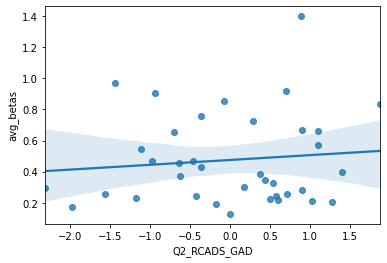

In [125]:
plt.close('all')
sns.regplot(y='avg_betas', x='Q2_RCADS_GAD', data=with_data)
plt.show()

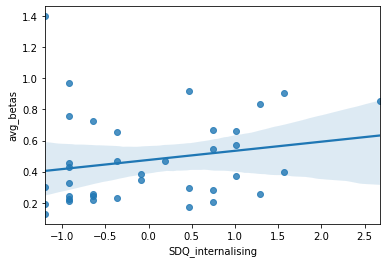

In [45]:
plt.close('all')
sns.regplot(y='avg_betas', x='SDQ_internalising', data=with_data)
plt.show()

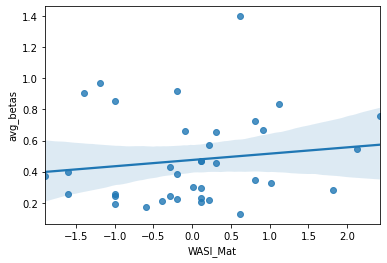

In [127]:
plt.close('all')
sns.regplot(y='avg_betas', x='WASI_Mat', data=with_data)
plt.show()

array([[<AxesSubplot:title={'center':'avg_betas'}>]], dtype=object)

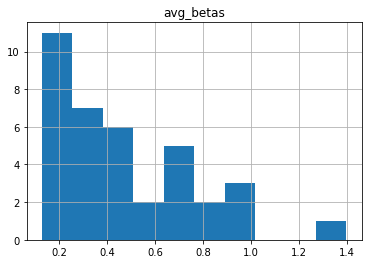

In [27]:
with_data.hist(column='avg_betas')

## Other betas

Look at other betas now and repeat the same thing as above

In [170]:
# Read in all the other beta csvs

# Use the values below to change the beta_df directory as needed
# faces vs control
faces = '/facesvscontrol_'
# nogo vs go
gng = '/nogovsgo_'
# sad nogo vs go
sad = '/sad_nogovsgo_'

# Change con & beta_df as needed
con = sad + 'betas.csv' #this is just for sanity check later to know which csv we're working with
beta_df = pd.read_csv(beta_dir + sad + 'betas.csv')
red_ids = pd.read_excel('/Users/stepheniuh/ownCloud/PhD/RED/MRI Quality Checks/RED_fmri_finalids.xlsx')
main_df = pd.merge(beta_df, red_ids, on='sub_id')

Repeat merging & cleaning with meta data steps

In [171]:
# convert red_id into strings for both
main_df['red_id'] = main_df['red_id'].astype(str)
#meta_df['red_id'] = meta_df['red_id'].astype(str)

# merge on red_id
with_data = pd.merge(main_df, meta_df, on='red_id')

# rename columns
# value = new name
names = {'sub_id_x': 'sub_id',
         'cbu_id_x': 'cbu_id',
         'mri_tag_x': 'mri_tag'}

with_data.rename(columns=names, inplace=True)

# drop columns
with_data = with_data.drop(columns = ['Unnamed: 0', 'sub_id_y', 'cbu_id_y', 'mri_tag_y'])

# view final dataframe
pd.set_option('display.max_columns', None) # to view all columns set this for dataframe viewing
# view data
display(with_data)

,sub_id,avg_betas,red_id,cbu_id,mri_tag,Age,Equivalised_Income,WASI_Mat,WASI_Voc,SDQ_emotional,SDQ_conduct,SDQ_peer,SDQ_hyperactivity,SDQ_prosocial,SDQ_total,SDQ_externalising,SDQ_internalising,objective_SES,subjective_SES,household_SES,Q2_RCADS_MDD,Q2_RCADS_GAD
0,sub-003,0.761586,99004,CBU190038,MR18013,2.784761,-0.896990,-0.993397,-1.561581,-0.516184,-0.434971,-0.980174,0.790965,-0.267326,-0.325920,0.299106,-0.919932,-1.633130,0.522199,-1.396517,-0.071807,-0.422822
1,sub-005,0.530455,99013,CBU190092,MR18013,1.481889,0.357089,0.111282,0.404703,-0.141698,-0.434971,-0.476474,0.050061,0.227227,-0.325920,-0.171827,-0.366477,0.430405,-0.060432,1.219825,0.215727,-1.174547
2,sub-007,0.917379,99019,CBU190124,MR18013,0.352666,1.611169,-1.595949,-1.561581,2.105221,0.570899,0.027227,1.161417,0.721781,1.578141,1.005506,1.570616,1.329502,-0.580815,-1.080703,1.783391,1.406493
3,sub-008,1.329992,99014,CBU190129,MR18013,-1.526744,0.357089,2.119790,0.782835,-0.516184,1.073834,2.042029,1.161417,-3.729201,1.260797,1.240973,0.740433,0.430405,-0.060432,1.219825,1.676116,-1.112142
4,sub-009,0.660551,99009,CBU190146,MR18013,0.592465,1.611169,0.814260,0.858461,-0.516184,0.570899,0.530928,0.420513,0.721781,0.308767,0.534573,-0.089749,1.630812,-1.169286,-0.968391,0.058346,0.432178
5,sub-011,0.523350,99018,CBU190171,MR18013,0.611350,-0.060937,-0.993397,0.177824,-0.890670,-0.434971,-0.980174,-0.690843,0.721781,-1.119279,-0.642760,-1.196660,0.229950,-1.787409,1.611688,-0.785413,-0.176510
6,sub-012,0.569924,99016,CBU190173,MR18013,-1.754489,0.357089,0.010857,0.782835,-0.890670,-0.937905,-0.980174,1.531869,-0.761880,-0.325920,0.534573,-1.196660,0.576008,-0.650956,-0.597785,0.935886,0.172179
7,sub-013,0.367893,99021,CBU190190,MR18013,0.488596,-0.896990,0.111282,0.329077,1.356248,0.067964,-0.980174,0.420513,0.721781,0.467438,0.299106,0.463706,-0.960004,0.483775,-0.196420,-1.607250,-2.316162
8,sub-014,0.453573,99020,CBU190201,MR18013,0.551662,-0.419763,0.814260,0.858461,-0.890670,-0.937905,0.027227,-0.690843,-0.267326,-0.960607,-0.878227,-0.643205,0.367572,-0.119219,0.001995,-0.173326,0.291325
9,sub-015,0.600104,99026,CBU190209,MR18013E,1.560919,0.357089,0.111282,-0.351560,0.607275,-0.434971,0.530928,0.050061,0.721781,0.308767,-0.171827,0.740433,0.423332,0.502573,-0.887183,-0.208132,1.278862


In [172]:
# Sanity check to know which contrast we're working with here
print(con)

/sad_nogovsgo_betas.csv


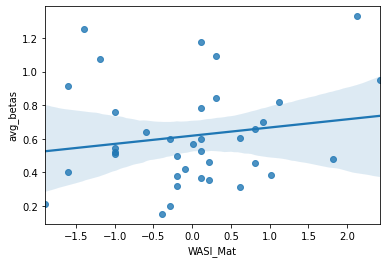

In [188]:
# Now do some analysis -- this can be whatever covariate you want really
plt.close('all')
sns.regplot(y='avg_betas', x='WASI_Mat', data=with_data)
plt.show()

array([[<AxesSubplot:title={'center':'avg_betas'}>]], dtype=object)

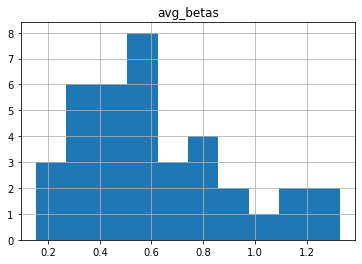

In [189]:
with_data.hist(column='avg_betas')

## CSV output for stats

Pull in all beta values and sub-ids to create an output of the averages
Then we can run more analyses in R :D

In [190]:
# Read in all beta csvs
happysad_df = pd.read_csv(beta_dir + '/happygo_sadgo_betas.csv')
faces_df = pd.read_csv(beta_dir + '/facesvscontrol_betas.csv')
gng_df = pd.read_csv(beta_dir + '/nogovsgo_betas.csv')
sad_df = pd.read_csv(beta_dir + '/sad_nogovsgo_betas.csv')

In [196]:
# rename beta avg columns to differentiate each one before merging
happysad_df.rename(columns={"avg_betas": "happysad_betas"}, inplace=True)
faces_df.rename(columns={"avg_betas": "facescontrol_betas"}, inplace=True)
gng_df.rename(columns={"avg_betas": "nogo_go_betas"}, inplace=True)
sad_df.rename(columns={"avg_betas": "sad_gng_betas"}, inplace=True)

In [199]:
# from above red_ids what we read in for final fmri ids
# multi-way merge using reduce
from functools import reduce

# put all dfs in a list
dfs = [red_ids, happysad_df, faces_df, gng_df, sad_df]

# reduce and merge on sub-ids
all_betas = reduce(lambda left,right: pd.merge(left,right,on='sub_id'), dfs)

In [200]:
# to check
display(all_betas)

,sub_id,red_id,cbu_id,mri_tag,happysad_betas,facescontrol_betas,nogo_go_betas,sad_gng_betas
0,sub-002,99003,CBU180728,MR18013,0.362081,1.831537,0.632447,1.189030
1,sub-003,99004,CBU190038,MR18013,0.244647,3.438248,0.567535,0.761586
2,sub-005,99013,CBU190092,MR18013,0.231745,1.677125,0.558921,0.530455
3,sub-007,99019,CBU190124,MR18013,0.396660,1.169308,0.370656,0.917379
4,sub-008,99014,CBU190129,MR18013,0.545396,1.412787,0.352620,1.329992
5,sub-009,99009,CBU190146,MR18013,0.348532,2.386898,0.619249,0.660551
6,sub-011,99018,CBU190171,MR18013,0.192987,2.106507,0.203289,0.523350
7,sub-012,99016,CBU190173,MR18013,0.303265,2.853746,0.273334,0.569924
8,sub-013,99021,CBU190190,MR18013,0.296426,0.895370,0.169816,0.367893
9,sub-014,99020,CBU190201,MR18013,0.728237,3.121774,0.192304,0.453573


In [204]:
# write into csv (ownCloud directory for merging purposes)
all_betas.to_csv(output_dir + '/all_betas.csv', index = False)